## Lab 14 - Pagerank Algorithm

In [5]:
import numpy as np

### Problem 1

In [36]:
def adjmat(filename):
    nnodes = 0
    pairs = []
    with open('./matrix.txt','r') as f:
        next(f) #Skip header
        for line in f:
            line = line.strip().split()
            nnodes = max(int(line[0]), int(line[1]), 0)
            pairs.append(line)
    adjmat = np.zeros((nnodes+1, nnodes+1))
    for k in range(len(res)):
        i = int(pairs[k][0])
        j = int(pairs[k][1])
        adjmat[i,j] = 1
    return adjmat

In [75]:
result = adjmat('matrix.txt')
result

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

### Problem 2

In [88]:
def K(array):
    rowsum = array.sum(axis=1)
    for i in range(len(rowsum)):
        if rowsum[i] == 0:
            array[i,:] = np.ones(len(rowsum))
    D = array.sum(axis=1)
    K = array.T / D
    return K


In [89]:
K(result)

array([[ 0.        ,  1.        ,  0.125     ,  0.33333333,  0.33333333,
         0.5       ,  1.        ,  1.        ],
       [ 0.        ,  0.        ,  0.125     ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.125     ,  0.33333333,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.125     ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.125     ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.125     ,  0.        ,  0.33333333,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.125     ,  0.33333333,  0.33333333,
         0.5       ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.125     ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ]])

### Problem 3

In [90]:
def pagerankiter(A,N = None, d = 0.85, tol = 1e-5):
    if N == None:
        adjmat = A
        nsize = A.shape[0]
    else:
        adjmat = A[:N,:N]
        nsize = N
    Kmat = K(adjmat)
    error = 1
    p = np.ones(nsize)/nsize
    while error > tol:
        pn = p
        p = d*Kmat.dot(p) + (1 - d)/nsize * np.ones(nsize)
        error = np.linalg.norm(p-pn)
    return p

In [91]:
pagerankiter(result)

array([ 0.43868966,  0.02171029,  0.02786154,  0.02171029,  0.02171029,
        0.02786154,  0.04585394,  0.39460246])

### Problem 4

In [202]:
from scipy import linalg as la

def pagerankeig(A, N= None, d = 0.85):
    if N == None:
        adjmat = A
        nsize = A.shape[0]
    else:
        adjmat = A[:N, :N]
        nsize = N
    Kmat = K(adjmat)
    B = d*Kmat + ((1 - d)/nsize) * np.ones((nsize, nsize))
    eig, eigvec = la.eig(B)
    return eigvec[:,0]/ sum(eigvec[:,0]) #Normalize to vector of probabilities

In [201]:
pagerankeig(result)

array([ 0.43869288,  0.02171029,  0.02786154,  0.02171029,  0.02171029,
        0.02786154,  0.04585394,  0.39459924])

### Problem 5

In [181]:
# Reading in Data
import pandas as pd

df = pd.read_csv('ncaa2013.csv', delimiter=',')
pairs = [tuple(x) for x in df.values]
pairs = np.asarray(pairs)
# List of names
names = np.unique(pairs)

adjmat = np.zeros((len(names), len(names)))

for k in range(len(pairs)):
    j, = np.where(names == pairs[k,0])
    i, = np.where(names == pairs[k,1])
    adjmat[i,j] = 1

In [182]:
res = pagerankiter(adjmat, d = 0.7)
teamranks = names[np.argsort(res)][::-1]
teamranks

Our team ranks do match the correct values.

## Lab 10 - Conditioning and Stability

### Problem 1

In [215]:
def cond(A):
    U, s, vh = la.svd(A)
    if s.min() < 1e-8:
        return np.inf
    else:
        return s.max()/ s.min()

In [218]:
# Testing Against numpy.cond
A = np.array([[7,0.004],[0.005,1]])
print(cond(A) - np.linalg.cond(A))

# Testing Singular Matrix
A2 = np.array([[1,1],[1,1]]) # Singular Matrix
print(cond(A2))

# Testing Orthonormal Matrix
Q, R = la.qr(A)
print(cond(Q))

8.881784197e-16
inf
1.0


### Problem 2

In [232]:
import sympy as sy
from matplotlib import pyplot as plt
%matplotlib inline

In [268]:
def wilkinsonexp(n):
    w_roots = np.arange(1,21)
    # Get exact coefficients
    x, i = sy.symbols('x i')
    w = sy.poly_from_expr(sy.product(x-i, (i,1,20)))[0]
    w_coeffs = np.array(w.all_coeffs())
    condmat = np.zeros((n,2)) # Matrix to store cond numbers
    plt.plot(w_roots.real, w_roots.imag, "o", label = 'Original')
    for i in range(n):
        # Draw random integer for coefficient to perturb
        k =np.random.randint(0,21)
        # Draw random perturbation
        perturb = np.random.normal(1,1e-10)
        # Get new coefficients
        h = np.ones(21)
        h[k] = perturb
        new_coeffs = w_coeffs * h
        new_roots = np.roots(np.poly1d(new_coeffs))
        plt.plot(new_roots.real, new_roots.imag,"k,")
        #Absolute Cond Number
        condmat[i,0] = la.norm(new_roots - w_roots, np.inf) / la.norm(h, np.inf)
        condmat[i,1] = la.norm(w_coeffs, np.inf) / la.norm(w_roots, np.inf)
    plt.xlabel("Real")
    plt.ylabel("Imaginary")
    plt.title('Simulation')
    plt.show()
    return condmat

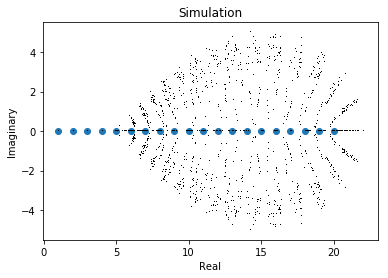

array([[  2.02143088e+01,   6.90187988e+17],
       [  2.00377215e+01,   6.90187988e+17],
       [  1.96982447e+01,   6.90187988e+17],
       [  1.90000000e+01,   6.90187988e+17],
       [  1.90108790e+01,   6.90187988e+17],
       [  2.05954436e+01,   6.90187988e+17],
       [  1.90000000e+01,   6.90187988e+17],
       [  1.90030394e+01,   6.90187988e+17],
       [  1.90029532e+01,   6.90187988e+17],
       [  2.02736124e+01,   6.90187988e+17],
       [  1.94878565e+01,   6.90187988e+17],
       [  1.90000000e+01,   6.90187988e+17],
       [  1.90000000e+01,   6.90187988e+17],
       [  1.99788002e+01,   6.90187988e+17],
       [  2.03366044e+01,   6.90187988e+17],
       [  1.97484690e+01,   6.90187988e+17],
       [  1.90000000e+01,   6.90187988e+17],
       [  1.98806073e+01,   6.90187988e+17],
       [  1.93551576e+01,   6.90187988e+17],
       [  1.90107773e+01,   6.90187988e+17],
       [  2.03048491e+01,   6.90187988e+17],
       [  2.01551366e+01,   6.90187988e+17],
       [  

In [269]:
wilkinsonexp(100)

### Problem 3

In [270]:
def eigenperturb(A):
    #Construct Perturation
    reals = np.random.normal(0, 1e-10, A.shape)
    imags = np.random.normal(0, 1e-10, A.shape)
    H = reals + 1j*imags
    l = la.eigvals(A) 
    lp = la.eigvals(A + H)
    abscon = np.linalg.norm(l - lp) / np.linalg.norm(H)
    relcon = np.linalg.norm(A) / np.linalg.norm(l) * abscon
    return abscon, relcon

### Problem 4

In [293]:
def relcon(bounds,res):
    xmin, xmax, ymin, ymax = bounds
    # Generate grid
    xgrid = np.linspace(xmin, xmax, res)
    ygrid = np.linspace(ymin, ymax, res)
    vals = np.zeros((res, res))
    for i in range(res):
        for j in range(res):
            x = xgrid[i]
            y = ygrid[j]
            A = np.array([[1,x],[y,1]])
            abscon, relcon = eigenperturb(A)
            vals[i,j] = relcon
    plt.pcolormesh(xgrid, ygrid, vals, cmap='gray_r')
    plt.colorbar()
    plt.show()


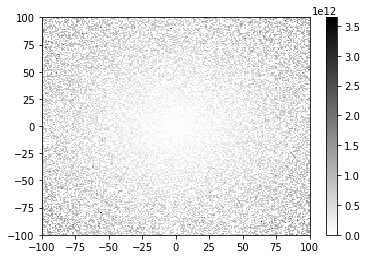

In [294]:
relcon((-100,100,-100,100), 200)

### Problem 5

In [308]:
def polytest(n, file):
    xk, yk = np.load(file).T
    A = np.vander(xk, n+1)
    # Solving using normal equations
    coeffs = la.inv((A.T.dot(A))).dot(A.T).dot(yk)
    fe = np.linalg.norm(A.dot(coeffs) - yk)
    # Solving using QR
    Q , R = la.qr(A, mode='economic')
    coeffs2 = la.solve_triangular(R, Q.T.dot(yk))
    fe2 = np.linalg.norm(A.dot(coeffs2) - yk)
    plt.plot(xk, yk, ".k")
    plt.plot(xk, np.polyval(coeffs,xk), label="Normal Equations")
    plt.plot(xk, np.polyval(coeffs2,xk), label = "QR Solver")
    plt.legend()
    plt.title("Fit of Data for Polynomial of Degree " + str(n))
    plt.show()
    return fe, fe2

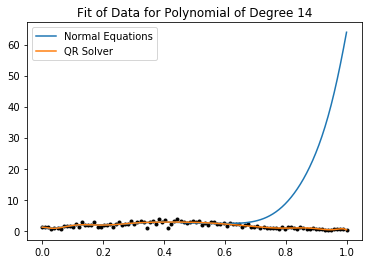

(152.14373083729362, 4.5683709417007901)

In [309]:
polytest(14, 'stability_data.npy')

As we can see, the forward errors for the QR algorithm are much smaller.

### Problem 6

In [436]:
def problem6():
    grid = np.arange(5,50,5)
    fe = np.zeros((len(grid)))
    x = sy.Symbol('x')
    for i in range(len(grid)):
        n = int(grid[i])
        result = float(sy.integrate(x**n * sy.exp(x-1),(x,0,1)).evalf())
        result2 = float(((-1 ** n) * sy.subfactorial(n) + (-1)**(n+1)*sy.factorial(n) / sy.exp(1)).evalf())
        fe[i] = abs(result2 - result)/abs(result)
    plt.plot(grid, fe)
    plt.yscale('log')
    plt.show()
    

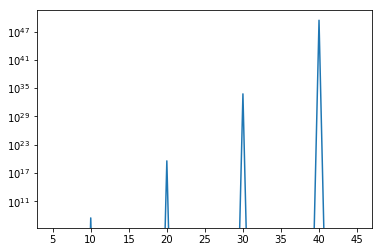

In [437]:
problem6()

We see that there are portions of n that have very high forward errors when computing via (10.6), which suggests that it is not a very numerically stable algorithm.

## Lab 8 - Numerical Differentiation

### Problem 1

In [423]:
x = sy.Symbol('x')
f = (sy.sin(x) + 1)**(sy.sin(sy.cos(x)))
derivative = sy.diff(f, x)
fl = sy.lambdify(x, f, 'numpy')
dl = sy.lambdify(x, derivative, 'numpy')

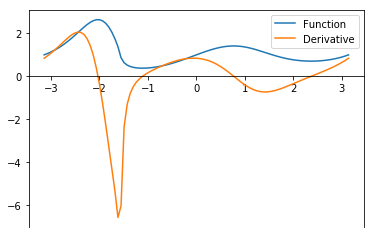

In [430]:
grid = np.linspace(-np.pi, np.pi,100)

ax = plt.gca()
ax.spines["bottom"].set_position("zero")
ax.plot(grid, fl(grid), label="Function")
ax.plot(grid, dl(grid), label="Derivative")
plt.legend()
plt.show()


### Problem 2

In [434]:
# Lets create functions to approximate the differences
def forward1(f, x, h):
    y = np.zeros_like(x)
    y = (f(x + h) - f(x)) / h
    return y

def forward2(f,x,h):
    y = (-3*f(x) + 4*f(x+h) - f(x+2*h))/(2*h)
    return y

def backward1(f,x,h):
    return (f(x) - f(x-h))/h

def backward2(f,x,h):
    return (3*f(x) - 4*f(x-h) + f(x-2*h))/(2*h)

def centered1(f,x,h):
    return (f(x+h) - f(x-h))/(2*h)

def centered2(f,x,h):
    return (f(x-2*h) - 8*f(x-h) + 8*f(x+h) - f(x + 2*h))/(12*h)

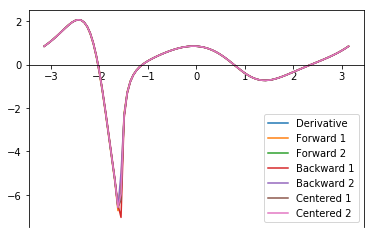

In [435]:
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
ax.plot(grid, dl(grid), label="Derivative")
ax.plot(grid, forward1(fl,grid,0.01), label="Forward 1")
ax.plot(grid, forward2(fl,grid,0.01), label="Forward 2")
ax.plot(grid, backward1(fl,grid,0.01), label="Backward 1")
ax.plot(grid, backward2(fl, grid, 0.01), label="Backward 2")
ax.plot(grid, centered1(fl, grid, 0.01), label = "Centered 1")
ax.plot(grid, centered2(fl, grid, 0.01), label = "Centered 2")
plt.legend()
plt.show()


All of our approximations approximate the original function closely.

### Problem 3

In [438]:
def problem3(x):
    logspace = np.logspace(-8,0,9)
    accx = dl(x)
    aerror = np.zeros(len(logspace), 6)
    for i in range(len(logspace)):
        aerror[i,0] = forward1(fl, x, logspace[i]) - accx
        aerror[i,1] = forward2(fl, x, logspace[i]) - accx
        aerror[i,2] = backward1(fl, x, logspace[i]) - accx
        aerror[i,3] = backward2(fl,x,logspace[i]) - accx
        aerror[i,4] = centered1(fl, x, logspace[i]) - accx
        aerror[i,5] = centered2(fl, x, logspace[i]) - accx
    
        
        

In [439]:
logspace

array([  1.00000000e-08,   1.00000000e-07,   1.00000000e-06,
         1.00000000e-05,   1.00000000e-04,   1.00000000e-03,
         1.00000000e-02,   1.00000000e-01,   1.00000000e+00])